In [1]:
from datasets import list_datasets

all_datasets = list_datasets()
print(f"There are {len(all_datasets)} datasets currently available on the Hub")
print(f"The first 10 are: {all_datasets[:10]}")

There are 23039 datasets currently available on the Hub
The first 10 are: ['acronym_identification', 'ade_corpus_v2', 'adversarial_qa', 'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'ai2_arc', 'air_dialogue', 'ajgt_twitter_ar', 'allegro_reviews']


In [1]:
from datasets import load_dataset

emoji = load_dataset("tweet_eval", "emoji")

Found cached dataset tweet_eval (C:/Users/qilin/.cache/huggingface/datasets/tweet_eval/emoji/1.1.0/12aee5282b8784f3e95459466db4cdf45c6bf49719c25cdb0743d71ed0410343)


  0%|          | 0/3 [00:00<?, ?it/s]

In [3]:
emoji

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 45000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 5000
    })
})

In [3]:
train_ds = emoji["train"]
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 45000
})

In [5]:
len(train_ds)

45000

In [6]:
train_ds[0]

{'text': 'Sunday afternoon walking through Venice in the sun with @user ️ ️ ️ @ Abbot Kinney, Venice',
 'label': 12}

In [7]:
train_ds.column_names

['text', 'label']

In [8]:
print(train_ds.features)

{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['❤', '😍', '😂', '💕', '🔥', '😊', '😎', '✨', '💙', '😘', '📷', '🇺🇸', '☀', '💜', '😉', '💯', '😁', '🎄', '📸', '😜'], id=None)}


In [4]:
print(train_ds[:5])

{'text': ['Sunday afternoon walking through Venice in the sun with @user ️ ️ ️ @ Abbot Kinney, Venice', "Time for some BBQ and whiskey libations. Chomp, belch, chomp! (@ Lucille's Smokehouse Bar-B-Que)", 'Love love love all these people ️ ️ ️ #friends #bff #celebrate #blessed #sundayfunday @ San…', '️ ️ ️ ️ @ Toys"R"Us', 'Man these are the funniest kids ever!! That face! #HappyBirthdayBubb @ FLIPnOUT Xtreme'], 'label': [12, 19, 0, 0, 2]}


In [156]:
import pandas as pd

emoji.set_format(type="pandas")
df = emoji["train"][:]  #! need to have this [:]
df.head()

,text,label
0,Sunday afternoon walking through Venice in the...,12
1,Time for some BBQ and whiskey libations. Chomp...,19
2,Love love love all these people ️ ️ ️ #friends...,0
3,"️ ️ ️ ️ @ Toys""R""Us",0
4,Man these are the funniest kids ever!! That fa...,2


In [157]:
emoji["train"].features["label"].int2str(3)

'💕'

In [158]:
def label_int2str(row):
    return emoji["train"].features["label"].int2str(row)

df["label_name"] = df["label"].apply(label_int2str)
df.head(10)

,text,label,label_name
0,Sunday afternoon walking through Venice in the...,12,☀
1,Time for some BBQ and whiskey libations. Chomp...,19,😜
2,Love love love all these people ️ ️ ️ #friends...,0,❤
3,"️ ️ ️ ️ @ Toys""R""Us",0,❤
4,Man these are the funniest kids ever!! That fa...,2,😂
5,"#sandiego @ San Diego, California",11,🇺🇸
6,My little ️ ️ ️ ️ ️ #ObsessedWithMyDog @ Cafe ...,0,❤
7,"More #tinyepic things #tinyepicwestern, this o...",19,😜
8,Last night ️ @ Omnia Night Club At Caesars Palace,0,❤
9,friendship at its finest. ....#pixar #toystory...,7,✨


In [159]:
# import matplotlib, mplcairo
# print('Default backend: ' + matplotlib.get_backend())
# matplotlib.use("module://GTK4Cairo")
# print('Backend is now ' + matplotlib.get_backend())

C:\Users\qilin\.conda\envs\qw\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128175 (\N{HUNDRED POINTS SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\qilin\.conda\envs\qw\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\qilin\.conda\envs\qw\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127480 (\N{REGIONAL INDICATOR SYMBOL LETTER S}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\qilin\.conda\envs\qw\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128156 (\N{PURPLE HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\qilin\.conda\envs\qw\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128540 (\N{FACE WITH STUCK-OUT TONGUE AND WINKING EYE}) missing from cur

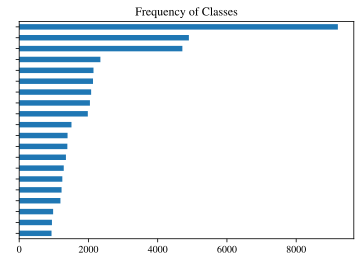

In [160]:
# %matplotlib qt
matplotlib.use('qtagg')
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

#! https://towardsdatascience.com/how-i-got-matplotlib-to-plot-apple-color-emojis-c983767b39e0
# matplotlib.rcParams.update(
#     {
#         'text.usetex': False,
#         'font.family': 'stixgeneral',
#         'mathtext.fontset': 'stix',
#     }
# )

prop = FontProperties(fname='./AppleColorEmoji.ttf')
plt.rcParams['font.family'] = prop.get_family()

df["label_name"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

In [161]:
df

,text,label,label_name
0,Sunday afternoon walking through Venice in the...,12,☀
1,Time for some BBQ and whiskey libations. Chomp...,19,😜
2,Love love love all these people ️ ️ ️ #friends...,0,❤
3,"️ ️ ️ ️ @ Toys""R""Us",0,❤
4,Man these are the funniest kids ever!! That fa...,2,😂
...,...,...,...
44995,Here to celebrate the Nunez wedding! Love my b...,0,❤
44996,1 night in Paris.... Wait... @ Paris Las Vegas...,1,😍
44997,Be safe this weekend everyone. #happylaborday ...,11,🇺🇸
44998,"Pizza (@ Five50 - @user in Las Vegas, NV)",1,😍


C:\Users\qilin\.conda\envs\qw\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9728 (\N{BLACK SUN WITH RAYS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\qilin\.conda\envs\qw\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\qilin\.conda\envs\qw\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 10084 (\N{HEAVY BLACK HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\qilin\.conda\envs\qw\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\qilin\.conda\envs\qw\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127480 (\N{REGIONAL INDICATOR SYMBOL LETTER S}) missing from current font.
  fig.canvas.print_figur

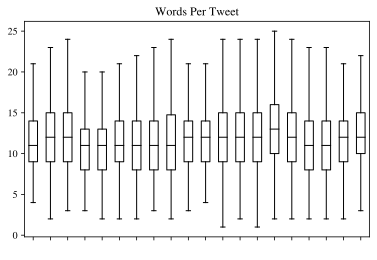

In [162]:
df["Words Per Tweet"] = df["text"].str.split().apply(len)
df.boxplot("Words Per Tweet", by="label_name", grid=False, showfliers=False,
           color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [163]:
emoji.reset_format()

In [2]:
from transformers import AutoTokenizer

model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [3]:
tokenizer.vocab_size

30522

In [4]:
tokenizer.model_max_length


512

In [174]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

In [168]:
emoji["train"][:2]

{'text': ['Sunday afternoon walking through Venice in the sun with @user ️ ️ ️ @ Abbot Kinney, Venice',
  "Time for some BBQ and whiskey libations. Chomp, belch, chomp! (@ Lucille's Smokehouse Bar-B-Que)"],
 'label': [12, 19]}

In [3]:
def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)
print(tokenize(emoji["train"][:2]))
#! Need to reset_format, otherwise emoji["train"][:2] is a pd Series, not a list

{'input_ids': [[101, 4465, 5027, 3788, 2083, 7914, 1999, 1996, 3103, 2007, 1030, 5310, 1030, 11428, 12631, 5420, 1010, 7914, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 2051, 2005, 2070, 22861, 4160, 1998, 13803, 5622, 23757, 2015, 1012, 16480, 8737, 1010, 19337, 2818, 1010, 16480, 8737, 999, 1006, 1030, 28016, 1005, 1055, 5610, 4580, 3347, 1011, 1038, 1011, 10861, 1007, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [180]:
tokens2ids = list(zip(tokenizer.all_special_tokens, tokenizer.all_special_ids))
tokens2ids

[('[UNK]', 100), ('[SEP]', 102), ('[PAD]', 0), ('[CLS]', 101), ('[MASK]', 103)]

In [181]:
data = sorted(tokens2ids, key=lambda x : x[-1])
data

[('[PAD]', 0), ('[UNK]', 100), ('[CLS]', 101), ('[SEP]', 102), ('[MASK]', 103)]

In [182]:
df = pd.DataFrame(data, columns=["Special Token", "Special Token ID"])
df.T

,0,1,2,3,4
Special Token,[PAD],[UNK],[CLS],[SEP],[MASK]
Special Token ID,0,100,101,102,103


In [4]:
emoji_encoded = emoji.map(tokenize, batched=True, batch_size=None)
emoji_encoded

# By default, the `map()` method operates individually on every example in the corpus, so setting `batched=True` will encode the tweets in batches. Because we've set `batch_size=None`, our `tokenize()` function will be applied on the full dataset as a single batch. This ensures that the input tensors and attention masks have the same shape globally, and we can see that this operation has added new `input_ids` and `attention_mask` columns to the dataset:
#

Loading cached processed dataset at C:\Users\qilin\.cache\huggingface\datasets\tweet_eval\emoji\1.1.0\12aee5282b8784f3e95459466db4cdf45c6bf49719c25cdb0743d71ed0410343\cache-599c22a54c71cffc.arrow
Loading cached processed dataset at C:\Users\qilin\.cache\huggingface\datasets\tweet_eval\emoji\1.1.0\12aee5282b8784f3e95459466db4cdf45c6bf49719c25cdb0743d71ed0410343\cache-1ee614d03d9e050a.arrow
Loading cached processed dataset at C:\Users\qilin\.cache\huggingface\datasets\tweet_eval\emoji\1.1.0\12aee5282b8784f3e95459466db4cdf45c6bf49719c25cdb0743d71ed0410343\cache-0cc75c2f75c8ffba.arrow


DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 45000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 50000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 5000
    })
})

In [5]:
print(emoji_encoded["train"].column_names)

['text', 'label', 'input_ids', 'attention_mask']


In [6]:
import torch
from transformers import AutoModel

model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.bias', 'vocab_projector.weight', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [186]:
text = "this is a test"
inputs = tokenizer(text, return_tensors="pt")
print(f"{inputs}\n"
      f"Input tensor shape: {inputs['input_ids'].size()},\n"
      f"{type(inputs)}\n"
      f"{type(inputs.items())}\n"
      f"{inputs.items()}")

{'input_ids': tensor([[ 101, 2023, 2003, 1037, 3231,  102]]), 'attention_mask':
tensor([[1, 1, 1, 1, 1, 1]])}
Input tensor shape: torch.Size([1, 6]),
<class 'transformers.tokenization_utils_base.BatchEncoding'>
<class 'dict_items'>
dict_items([('input_ids', tensor([[ 101, 2023, 2003, 1037, 3231,  102]])),
('attention_mask', tensor([[1, 1, 1, 1, 1, 1]]))])


In [187]:
inputs_ = {k:v.to(device) for k,v in inputs.items()}

print(f"{type(inputs_)}\n"
      f"{inputs_}"
      f"")

<class 'dict'>
{'input_ids': tensor([[ 101, 2023, 2003, 1037, 3231,  102]], device='cuda:0'),
'attention_mask': tensor([[1, 1, 1, 1, 1, 1]], device='cuda:0')}


In [188]:
with torch.no_grad():
    outputs = model(**inputs_)
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ...,
-0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]],
       device='cuda:0'), hidden_states=None, attentions=None)


In [7]:
def extract_hidden_states(batch):
    # Place model inputs on the GPU
    inputs = {k:v.to(device) for k,v in batch.items()
              if k in tokenizer.model_input_names}
    # Extract last hidden states
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
    # Return vector for [CLS] token
    return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}

In [8]:
emoji_encoded.set_format("torch",
                            columns=["input_ids", "attention_mask", "label"])

In [9]:
emoji_hidden = emoji_encoded.map(extract_hidden_states, batched=True)

Map:   0%|          | 0/45000 [00:00<?, ? examples/s]

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

In [192]:
emoji_hidden["train"].column_names

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

In [10]:
import numpy as np

X_train = np.array(emoji_hidden["train"]["hidden_state"])
X_valid = np.array(emoji_hidden["validation"]["hidden_state"])
y_train = np.array(emoji_hidden["train"]["label"])
y_valid = np.array(emoji_hidden["validation"]["label"])
X_train.shape, X_valid.shape

((45000, 768), (5000, 768))

In [11]:
X_train

array([[-0.01692697, -0.07621973,  0.11267376, ..., -0.24565226,
         0.5017392 ,  0.23954701],
       [ 0.06815211, -0.1468412 , -0.02333211, ..., -0.10349583,
         0.32523105,  0.20691183],
       [ 0.13633014,  0.01873105,  0.244973  , ..., -0.04182771,
         0.06130219,  0.32497784],
       ...,
       [ 0.10825697, -0.05063495,  0.26484212, ..., -0.19664523,
         0.15802385,  0.39161298],
       [-0.064469  , -0.28467205, -0.01227472, ..., -0.10483211,
         0.21553758,  0.34196332],
       [ 0.07933523, -0.17067677,  0.1485873 , ..., -0.26517728,
         0.23754744,  0.21975504]], dtype=float32)

In [12]:
import umap.umap_ as umap
#! https://stackoverflow.com/questions/57242208/how-to-resolve-the-error-module-umap-has-no-attribute-umap-i-tried-installi

# from umap import UMAP
from sklearn.preprocessing import MinMaxScaler

# Scale features to [0,1] range
X_scaled = MinMaxScaler().fit_transform(X_train)
# Initialize and fit UMAP
mapper = umap.UMAP(n_components=2, metric="cosine").fit(X_scaled)
# Create a DataFrame of 2D embeddings
df_emb = pd.DataFrame(mapper.embedding_, columns=["X", "Y"])
df_emb["label"] = y_train
df_emb.head()

,X,Y,label
0,9.855553,10.233335,12
1,8.087310,12.758039,19
2,8.088079,3.183757,0
3,12.915228,9.510148,0
4,7.700541,8.263727,2


In [143]:
rank = df_emb["label"].value_counts(sort=True,ascending=False)
len(rank.index)

20

In [197]:
emoji["train"].features["label"].names

['❤',
 '😍',
 '😂',
 '💕',
 '🔥',
 '😊',
 '😎',
 '✨',
 '💙',
 '😘',
 '📷',
 '🇺🇸',
 '☀',
 '💜',
 '😉',
 '💯',
 '😁',
 '🎄',
 '📸',
 '😜']

C:\Users\qilin\AppData\Local\Temp\ipykernel_28084\542688251.py:17: UserWarning: Glyph 128149 (\N{TWO HEARTS}) missing from current font.
  plt.tight_layout()
C:\Users\qilin\AppData\Local\Temp\ipykernel_28084\542688251.py:17: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  plt.tight_layout()
C:\Users\qilin\AppData\Local\Temp\ipykernel_28084\542688251.py:17: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from current font.
  plt.tight_layout()
C:\Users\qilin\AppData\Local\Temp\ipykernel_28084\542688251.py:17: UserWarning: Glyph 128153 (\N{BLUE HEART}) missing from current font.
  plt.tight_layout()
C:\Users\qilin\AppData\Local\Temp\ipykernel_28084\542688251.py:17: UserWarning: Glyph 128247 (\N{CAMERA}) missing from current font.
  plt.tight_layout()
C:\Users\qilin\AppData\Local\Temp\ipykernel_28084\542688251.py:17: UserWarning: Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from current font.
  plt.tight_layout()
C:\Users\qilin\AppData\Local\Temp\ipykern

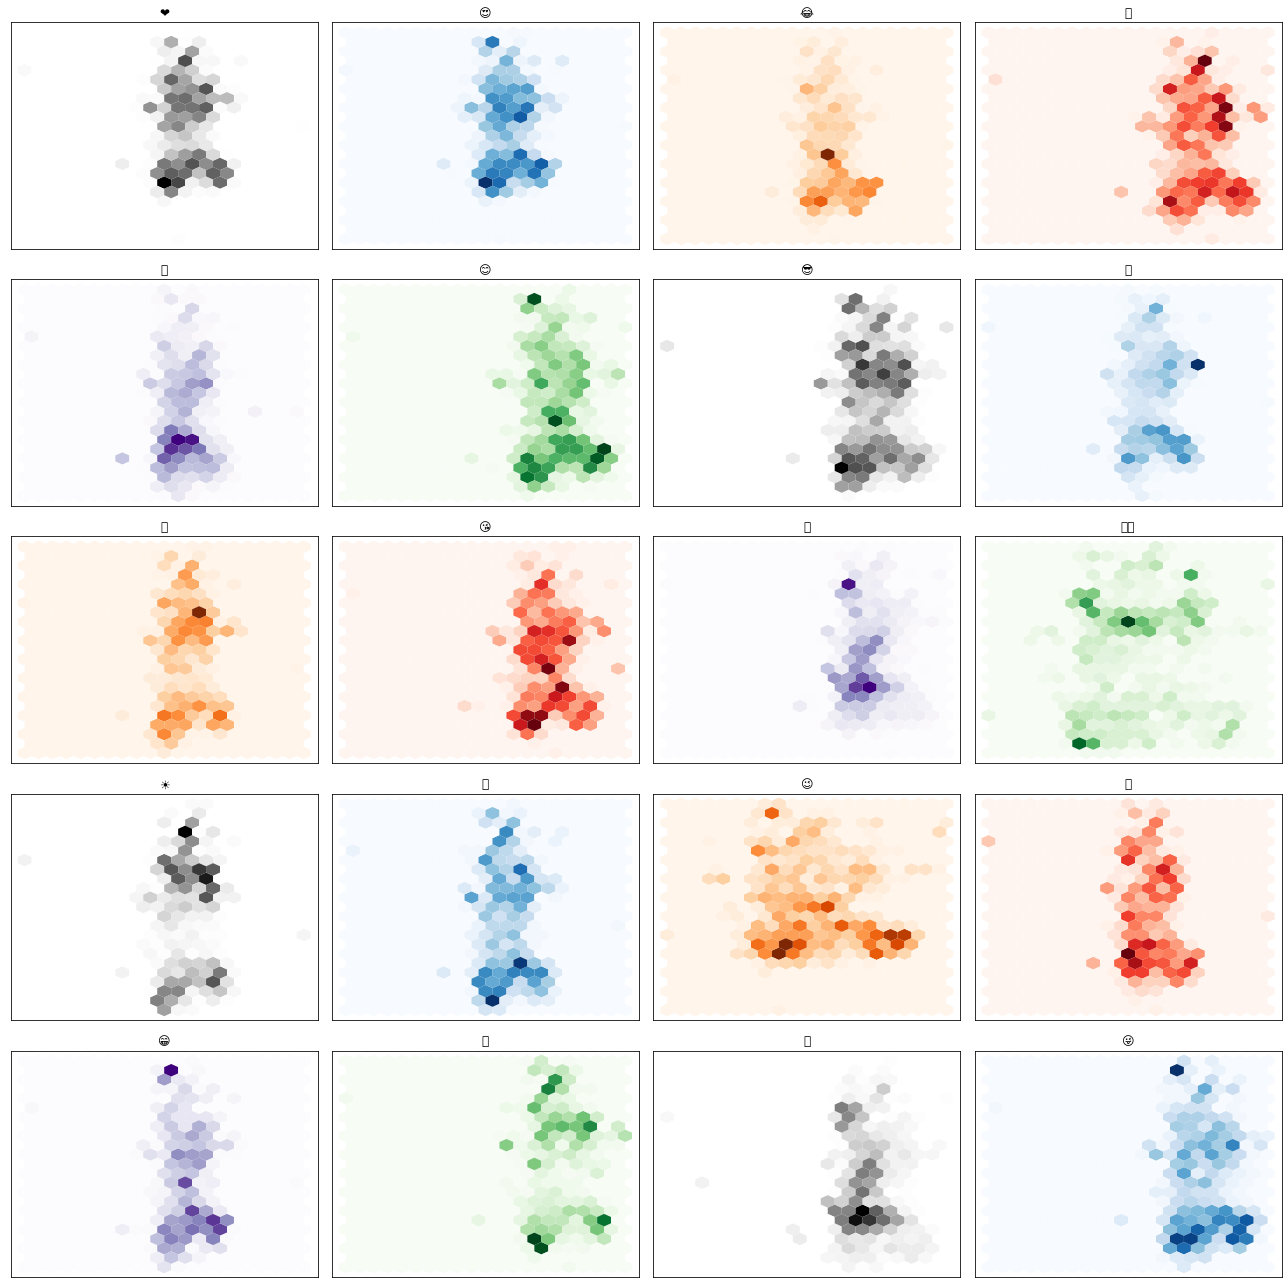

In [16]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(5, 4, figsize=(18,18))
axes = axes.flatten()
cmaps = ["Greys", "Blues", "Oranges", "Reds", "Purples", "Greens",
         "Greys", "Blues", "Oranges", "Reds", "Purples", "Greens",
         "Greys", "Blues", "Oranges", "Reds", "Purples", "Greens",
         "Greys", "Blues", "Oranges", "Reds", "Purples", "Greens",]
labels = emoji["train"].features["label"].names

for i, (label, cmap) in enumerate(zip(labels, cmaps)):
    df_emb_sub = df_emb.query(f"label == {i}")
    axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap,
                   gridsize=20, linewidths=(0,))
    axes[i].set_title(label)
    axes[i].set_xticks([]), axes[i].set_yticks([])

plt.tight_layout()
plt.show()

In [17]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

In [18]:
lr_clf.score(X_valid, y_valid)

0.309

In [19]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_valid, y_valid)

0.2112

C:\Users\qilin\.conda\envs\qw\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128149 (\N{TWO HEARTS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\qilin\.conda\envs\qw\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\qilin\.conda\envs\qw\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\qilin\.conda\envs\qw\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128153 (\N{BLUE HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\qilin\.conda\envs\qw\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128247 (\N{CAMERA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\qilin\.conda\envs\qw\lib\site-packages\IPyth

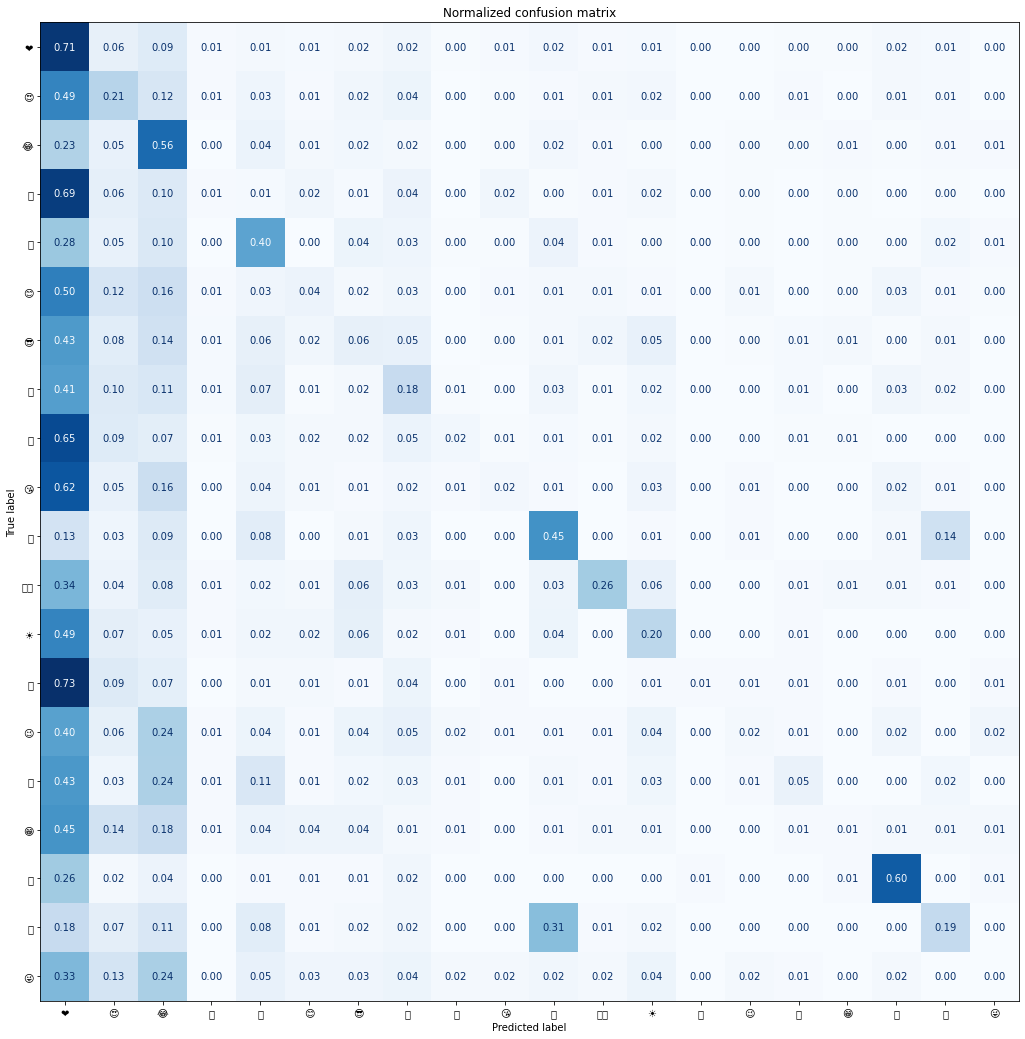

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(18, 18))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

y_preds = lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid, labels)


In [22]:
import torch
from transformers import AutoModelForSequenceClassification
model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

num_labels = 20
model = (AutoModelForSequenceClassification
         .from_pretrained(model_ckpt, num_labels=num_labels)
         .to(device))

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_projector.bias', 'vocab_projector.weight', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'classifier.weight', 'classifi

In [23]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

In [24]:
from huggingface_hub import notebook_login

notebook_login()
#. use huggingface-cli login

In [26]:
from transformers import Trainer, TrainingArguments

from transformers.integrations import NeptuneCallback

batch_size = 64
logging_steps = len(emoji_encoded["train"]) // batch_size
model_name = f"{model_ckpt}-finetuned-emoji"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=6,
                                  learning_rate=1e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=True,
                                  log_level="error",
                                  report_to="none")

In [36]:
import neptune
from transformers.integrations import NeptuneCallback
#
# run = neptune.init_run(
#     project="qilin1/nlp-book",
#     api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiIyYjRiNzI5NS0xNzRhLTQzZGYtYTI0Yi0yYmMxMzcyYmQwZGIifQ==",
# )

run = neptune.init_run(project='qilin1/nlp-book', api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiIyYjRiNzI5NS0xNzRhLTQzZGYtYTI0Yi0yYmMxMzcyYmQwZGIifQ==",)


https://app.neptune.ai/qilin1/nlp-book/e/NLPBOOK-7


In [37]:
neptune_callback = NeptuneCallback(run=run)

Exception ignored in: <function NeptuneCallback.__del__ at 0x000001B5624FC700>
Traceback (most recent call last):
  File "C:\Users\qilin\.conda\envs\qw\lib\site-packages\transformers\integrations.py", line 1278, in __del__
    if self._volatile_checkpoints_dir is not None:
AttributeError: 'NeptuneCallback' object has no attribute '_volatile_checkpoints_dir'


TypeError: run must be a Run or NoneType (was <class 'neptune.metadata_containers.run.Run'>)

In [27]:
from transformers import Trainer

trainer = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=emoji_encoded["train"],
                  eval_dataset=emoji_encoded["validation"],
                  tokenizer=tokenizer,
                  # callbacks=[neptune_callback]
                  )
trainer.train();

D:\Users\qilin\CloudStation\_MILA\6289\PROJ\distilbert-base-uncased-finetuned-emoji is already a clone of https://huggingface.co/qilin1/distilbert-base-uncased-finetuned-emoji. Make sure you pull the latest changes with `repo.git_pull()`.
C:\Users\qilin\.conda\envs\qw\lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss


In [28]:
preds_output = trainer.predict(emoji_encoded["validation"])

In [29]:
preds_output.metrics

{'test_loss': 2.192228078842163,
 'test_accuracy': 0.3484,
 'test_f1': 0.2761143447029536,
 'test_runtime': 3.9952,
 'test_samples_per_second': 1251.502,
 'test_steps_per_second': 19.774}

In [30]:
import numpy as np
import matplotlib.pyplot as plt
y_preds = np.argmax(preds_output.predictions, axis=1)
y_valid = np.array(emoji_encoded["validation"]["label"])
labels = emoji["train"].features["label"].names

C:\Users\qilin\.conda\envs\qw\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128149 (\N{TWO HEARTS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\qilin\.conda\envs\qw\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\qilin\.conda\envs\qw\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\qilin\.conda\envs\qw\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128153 (\N{BLUE HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\qilin\.conda\envs\qw\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128247 (\N{CAMERA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\qilin\.conda\envs\qw\lib\site-packages\IPyth

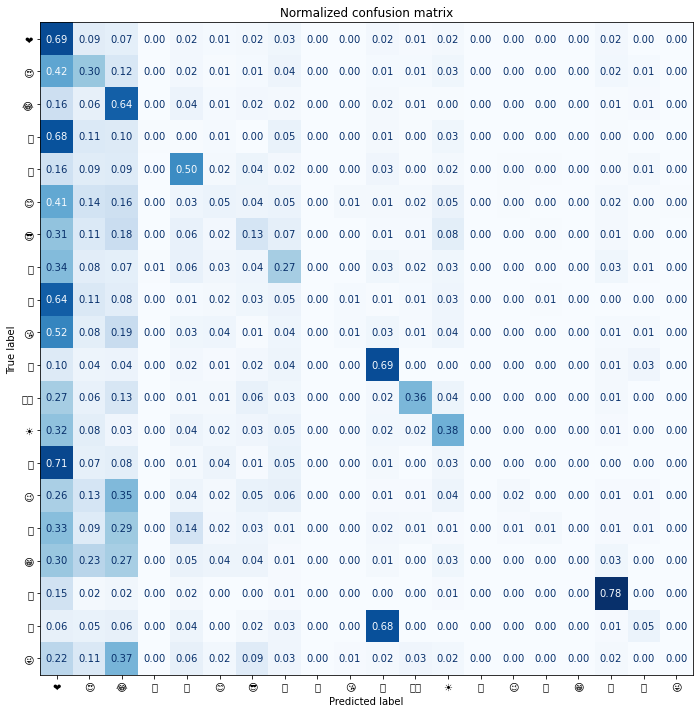

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(12, 12))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

plot_confusion_matrix(y_preds, y_valid, labels)

In [32]:
from torch.nn.functional import cross_entropy

def forward_pass_with_label(batch):
    # Place all input tensors on the same device as the model
    inputs = {k:v.to(device) for k,v in batch.items()
              if k in tokenizer.model_input_names}

    with torch.no_grad():
        output = model(**inputs)
        pred_label = torch.argmax(output.logits, axis=-1)
        loss = cross_entropy(output.logits, batch["label"].to(device),
                             reduction="none")

    # Place outputs on CPU for compatibility with other dataset columns
    return {"loss": loss.cpu().numpy(),
            "predicted_label": pred_label.cpu().numpy()}

In [33]:
# Convert our dataset back to PyTorch tensors
emoji_encoded.set_format("torch",
                            columns=["input_ids", "attention_mask", "label"])
# Compute loss values
emoji_encoded["validation"] = emoji_encoded["validation"].map(
    forward_pass_with_label, batched=True, batch_size=16)

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

In [37]:
emoji_encoded["validation"]

Dataset({
    features: ['text', 'label', 'input_ids', 'attention_mask', 'loss', 'predicted_label'],
    num_rows: 5000
})

In [35]:
def label_int2str(row):
    return emoji["train"].features["label"].int2str(row)

emoji_encoded.set_format("pandas")
cols = ["text", "label", "predicted_label", "loss"]
df_test = emoji_encoded["validation"][:][cols]
df_test["label"] = df_test["label"].apply(label_int2str)
df_test["predicted_label"] = (df_test["predicted_label"]
                              .apply(label_int2str))

In [36]:
df_test

,text,label,predicted_label,loss
0,A little throwback with my favourite person @ ...,❤,❤,1.181185
1,glam on @user yesterday for #kcon makeup using...,✨,✨,1.197095
2,Democracy Plaza in the wake of a stunning outc...,🇺🇸,🇺🇸,0.973925
3,Then &amp; Now. VILO @ Walt Disney Magic Kingdom,❤,❤,1.162820
4,Who never... @ A Galaxy Far Far Away,😂,❤,3.032290
...,...,...,...,...
4995,don't know what I'd do without you @ Keene Sta...,❤,❤,0.785668
4996,Senior night with my little Bailey !! So proud...,💕,❤,2.614268
4997,Real friends or labeled as family! #BrotherMan...,😎,❤,3.911575
4998,It makes me so happy meet people wearing hats ...,💕,😍,3.453013


In [44]:
df_test.sort_values("loss", ascending=False).head(100)

,text,label,predicted_label,loss
1015,Got fed with some fam ciiciimac @ Spring Grill...,📸,😍,6.130685
461,"~ church with welb ~ @ The Vineyard Church, Ur...",📷,❤,5.991639
4806,Down to my last week here in the !!! I'm liter...,🇺🇸,😂,5.922424
3341,Love my Patty @ Exodus Escape Rooms,☀,❤,5.887304
289,They love me out here! #paparazziLife @ Oaklan...,📷,❤,5.842279
...,...,...,...,...
1252,The most pleasant exhaustion. #tbt #nycmaratho...,📸,❤,4.950252
3384,happy bday to everyone's fav Mexican love you ...,😉,❤,4.934570
1078,⠀⠀⠀⠀6:53pm | Wednesdaze. @ Christian Renewal C...,☀,📷,4.929321
529,"Obama called me about how fresh I looked, I to...",📷,😂,4.925175


In [39]:
trainer.push_to_hub(commit_message="Training completed!")

Upload file pytorch_model.bin:   0%|          | 32.0k/255M [00:00<?, ?B/s]

remote: Scanning LFS files of refs/heads/main for validity...        
remote: LFS file scan complete.        
To https://huggingface.co/qilin1/distilbert-base-uncased-finetuned-emoji
   24dce9f..6fb0acc  main -> main

To https://huggingface.co/qilin1/distilbert-base-uncased-finetuned-emoji
   6fb0acc..fd39d34  main -> main



'https://huggingface.co/qilin1/distilbert-base-uncased-finetuned-emoji/commit/6fb0acc1946bd580fa4ec40e91c690583114fd7d'

In [40]:
model_ckpt

'distilbert-base-uncased'

In [ ]:
f""

In [41]:
from transformers import pipeline

model_ckpt = 'distilbert-base-uncased'
# Change `transformersbook` to your Hub username
model_id = f"qilin1/{model_ckpt}-finetuned-emoji"
classifier = pipeline("text-classification", model=model_id)

C:\Users\qilin\.conda\envs\qw\lib\site-packages\huggingface_hub\file_download.py:129: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\qilin\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [42]:
custom_tweet = "I saw a movie today and it was really good."
preds = classifier(custom_tweet, return_all_scores=True)

C:\Users\qilin\.conda\envs\qw\lib\site-packages\transformers\pipelines\text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar funcionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


C:\Users\qilin\.conda\envs\qw\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128149 (\N{TWO HEARTS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\qilin\.conda\envs\qw\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\qilin\.conda\envs\qw\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\qilin\.conda\envs\qw\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128153 (\N{BLUE HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\qilin\.conda\envs\qw\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128247 (\N{CAMERA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\qilin\.conda\envs\qw\lib\site-packages\IPyth

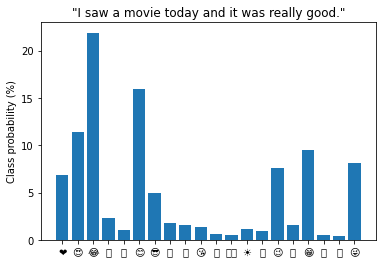

In [43]:
preds_df = pd.DataFrame(preds[0])
plt.bar(labels, 100 * preds_df["score"], color='C0')
plt.title(f'"{custom_tweet}"')
plt.ylabel("Class probability (%)")
plt.show()

In [45]:
emoji["train"].features["label"].names

['❤',
 '😍',
 '😂',
 '💕',
 '🔥',
 '😊',
 '😎',
 '✨',
 '💙',
 '😘',
 '📷',
 '🇺🇸',
 '☀',
 '💜',
 '😉',
 '💯',
 '😁',
 '🎄',
 '📸',
 '😜']